<a href="https://colab.research.google.com/github/wajdimusofa/10222140_Wajdi-Musofa_As/blob/main/10222140_Wajdi_Musofa_As_(up_to_date).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Penjelasan Dataset yang digunakan

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [87]:
df = pd.read_csv('sentimentdataset.csv')
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Data Understanding

In [88]:
len(df)


732

In [89]:
df['Text'].apply(lambda x: len(str(x).split())).mean()


np.float64(13.206284153005464)

In [90]:
df.duplicated().sum()


np.int64(0)

In [91]:
df.isnull().sum()


,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


#Dsitribusi Data


#Bar Centiment

<Axes: xlabel='Sentiment'>

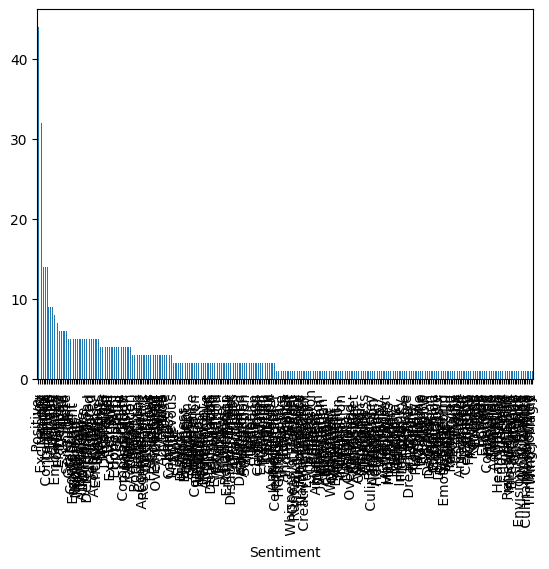

In [92]:
df['Sentiment'].value_counts().plot(kind='bar')


#Word Cloud

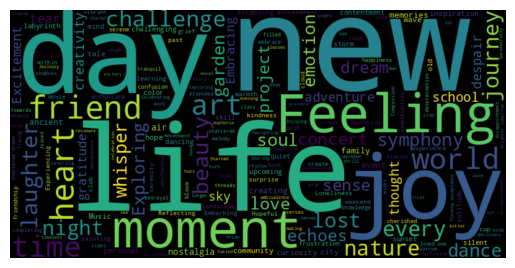

In [93]:
from wordcloud import WordCloud
text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Data Text Processing

In [111]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Normalisasi
    text = re.sub(r'[^a-z\s]', '', text)  # Hapus tanda baca dan angka
    tokens = word_tokenize(text)  # Tokenisasi
    tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return ' '.join(tokens)

df['clean_text'] = df['Text'].apply(clean_text)
print(df['clean_text'].head())  # Lihat hasil preprocessing
print("Teks kosong:", df['clean_text'].apply(lambda x: len(x.strip()) == 0).sum())  # Cek teks kosong


0           enjoy beauti day park
1            traffic terribl morn
2             finish amaz workout
3     excit upcom weekend getaway
4    tri new recip dinner tonight
Name: clean_text, dtype: object
Teks kosong: 0


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [112]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks dengan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
# Fit the vectorizer only on the training data
X = vectorizer.fit_transform(df['clean_text'])

In [124]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)


In [125]:
df['clean_text'] = df['Text'].apply(clean_text)


#Matrix Correlation

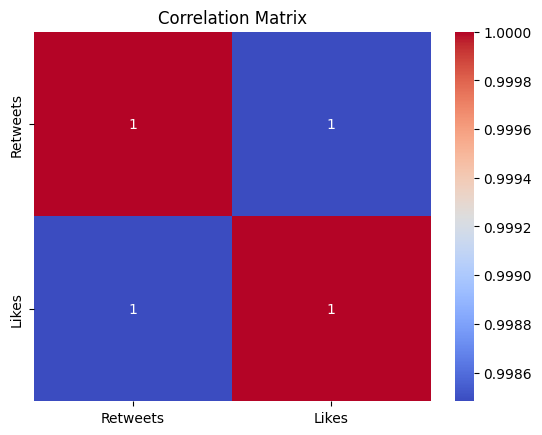

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Retweets', 'Likes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#Labeling Data

In [127]:
from textblob import TextBlob

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['clean_text'].apply(get_polarity)

def label_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['polarity'].apply(label_sentiment)


#Text Vectorisasi

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,1))
X = vectorizer.fit_transform(df['clean_text'])



#Data Splitting

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['Sentiment'])


In [133]:
print("Label unik:", df['Sentiment'].unique())
print("Encoded:", df['sentiment_label'].unique())

Label unik: [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessn

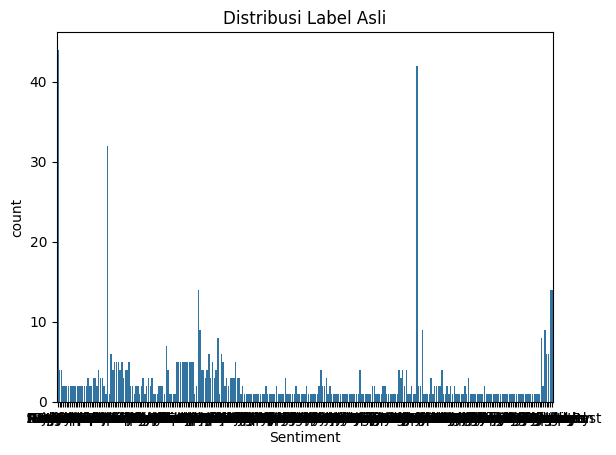

In [137]:
sns.countplot(x='Sentiment', data=df)
plt.title("Distribusi Label Asli")
plt.show()


In [138]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


## Data Modeling
#Model yang Dipilih:

Support Vector Machine (SVM): Cocok untuk data teks berdimensi tinggi.

Naive Bayes: Cepat dan efisien untuk klasifikasi teks.

In [132]:
from sklearn.svm import SVC

# Melatih model SVM dengan class_weight agar menangani data tidak seimbang
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train, y_train)


SVC(class_weight='balanced', kernel='linear')

In [139]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.5)  # alpha < 1 bisa bantu smoothing
nb_model.fit(X_train, y_train)


MultinomialNB(alpha=0.5)

In [140]:
new_texts = ["I hate this app", "Absolutely amazing experience", "Not bad, just okay"]


## Data Evaluasi

Confussion Matrix



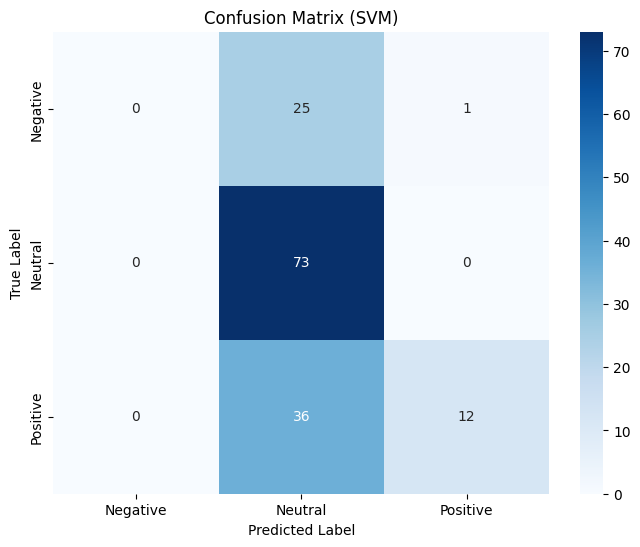

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, svm_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Get class names from the LabelEncoder
class_names = le.classes_

# Set the tick labels
plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()

Klasifikasi laporan

In [141]:
nb_pred = nb_model.predict(X_test)
print("Akurasi NB:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Akurasi NB: 0.7074829931972789
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        26
           1       0.64      0.96      0.77        73
           2       0.88      0.62      0.73        48

    accuracy                           0.71       147
   macro avg       0.84      0.58      0.59       147
weighted avg       0.78      0.71      0.67       147



In [106]:
# Data baru untuk prediksi
new_texts = ["I love this!", "This is terrible!", "Just okay."]

# Preprocessing teks baru
new_clean = [clean_text(t) for t in new_texts]

# Vektorisasi menggunakan vectorizer yang sudah di-fit pada data training
new_vec = vectorizer.transform(new_clean)

# Prediksi dengan SVM dan Naive Bayes
print("Prediksi SVM:", le.inverse_transform(svm_model.predict(new_vec)))
print("Prediksi Naive Bayes:", le.inverse_transform(nb_model.predict(new_vec)))

Prediksi SVM: ['Positive' 'Neutral' 'Neutral']
Prediksi Naive Bayes: ['Positive' 'Neutral' 'Neutral']


## Data Prediksi

In [107]:
new_text = ["I love this product!", "This is the worst experience ever."]
new_vec = vectorizer.transform(new_text)
svm_model.predict(new_vec)


array([2, 1])